This script visualizes daily temperatures calculated using driver data from the example folder and measured data from the corresponding permafrost monitoring station. 

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import subprocess
from matplotlib import pyplot as plt

Here we load calculated temperatures and measured data. The length of the time series defined by the length of the calculated time series (denoted by n1). In our case its 1 yr (365 days). 

In [14]:
calc_file='out/result.txt'
calc_data = np.loadtxt(calc_file, skiprows=0,  unpack=False)
meas_file='in/soil_resample_daily.csv'
df_meas = pd.read_csv(meas_file)
[n1,n2]=calc_data.shape # n1: time series lenght; n2: number cols in the file
[n3,n4]=df_meas.shape # n3: time series lenght; n4: number of measurements
print ('calculated data size (rows, cols):',n1,n2)
print ('measured data size:',n3,n4)

calculated data size (rows, cols): 365 13
measured data size: 398 8


Load grid file and set grid and vizualization depths

In [28]:
grid_file='in/grid.txt'
grid_data = np.loadtxt(grid_file, comments='#',  unpack=False)
m=int(grid_data[0])                 # number of vertical grid points
print ('number of grid points:',m)
                                    # Note: grid runs from grid_data[1] not o  
nm= int(grid_data[m+1])             # number of output grid point 
print ('number of outputs:',nm)
ind=grid_data[m+2:m+nm+2].astype(int)
print ('output indexes:',ind) 
print ('output depth values:',grid_data[ind]) # visualized grid points (depths)

number of grid points: 154
number of outputs: 9
output indexes: [39 47 49 54 59 69 81 94 99]
output depth values: [0.   0.05 0.1  0.2  0.3  0.5  0.74 1.   1.25]


Matching up measured and calculated results with the corresponding depth

In [30]:
calc_tair=calc_data[:,2]
calc_snd=calc_data[:,3]
calc_viz=calc_data[:,4:n2]
#meas_tair=meas_data[:,0]
#meas_viz=meas_data[0:n1,0:n4]
print ('shape of calc data', calc_viz.shape)
#print 'shape of meas data', meas_viz.shape


shape of calc data (365, 9)


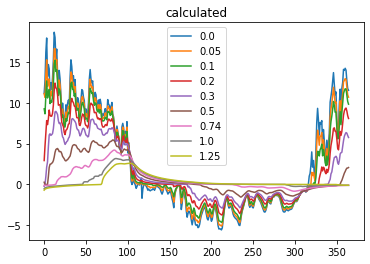

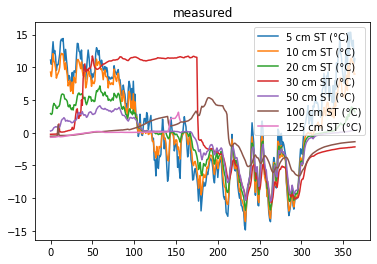

In [38]:
fig = plt.figure(figsize=(6, 4))
plt.plot(calc_viz);
plt.title('calculated')
plt.legend(grid_data[ind])
df_meas.iloc[:365,:].plot(title='measured')

Visualizing measured and calculated data

In [48]:
def plot_meas_vs_calc(calc,meas,vdepth):
    plt.plot(calc,'b',meas,'r--',linewidth=2.0)
    RMSE=np.sqrt(np.mean((calc-meas)**2))
    plt.title('depth:'+str(vdepth)+',  RMSE:'+str(round(RMSE,3)),fontsize=16 )
    plt.xlim([0, len(calc_viz)]);
    plt.ylabel('temperatures [C]', fontsize=16);
    plt.xlabel('time [days]',  fontsize=16);
    plt.tick_params(labelsize=16)

Ploting measured (in dash red) and calculated (is solid blue) temprature time series.

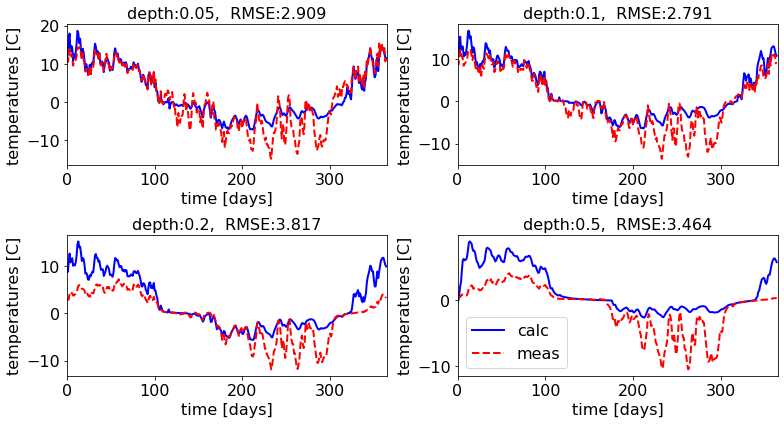

In [70]:
#calc_viz indexes:      [0    1   2   3   4   5   6   7   8]
#calc_viz depth values: [0. 0.05 0.1 0.2 0.3 0.5 0.74 1. 1.25]
#Index( '5 cm ST (°C)', '10 cm ST (°C)', '20 cm ST (°C)', '30 cm ST (°C)', 
#       '50 cm ST (°C)', '100 cm ST (°C)', '125 cm ST (°C)'],
calc_file='out/result.txt'
calc_data = np.loadtxt(calc_file, skiprows=0,  unpack=False)
calc_viz=calc_data[:,4:n2]

subprocess.call(["./gipl"])
fig = plt.figure()
fig.set_figheight(6); fig.set_figwidth(11)
ii=[1,2,3,5] # visualizing for depth index ii, where ii in [1,11]
hh=['5 cm ST (°C)', '10 cm ST (°C)', '20 cm ST (°C)', '50 cm ST (°C)']
for i,ih in zip(range(4),hh):
    k=ii[i]
    fig.add_subplot(2,2,i+1)
    meas_viz=df_meas[ih].iloc[:365].to_numpy()
    plot_meas_vs_calc(calc_viz[:,k-1],meas_viz,grid_data[ind[k]])
plt.legend(['calc','meas'],fontsize=16)
fig.tight_layout()